In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 64kB/s 
     |████████████████████████████████| 3.1MB 41.0MB/s 
     |████████████████████████████████| 501kB 64.6MB/s 


In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)
print("x_train[0].shape:", x_train[0].shape)

x_train.shape: (60000, 28, 28)
x_train[0].shape: (28, 28)


In [11]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [12]:
K = len(set(y_train))
K

10

In [0]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 29s 486us/sample - loss: 0.3487 - accuracy: 0.8683 - val_loss: 0.3402 - val_accuracy: 0.8734
Epoch 2/15
60000/60000 [==============================] - 29s 483us/sample - loss: 0.3033 - accuracy: 0.8856 - val_loss: 0.3279 - val_accuracy: 0.8824
Epoch 3/15
60000/60000 [==============================] - 29s 484us/sample - loss: 0.2733 - accuracy: 0.8963 - val_loss: 0.3213 - val_accuracy: 0.8812
Epoch 4/15
60000/60000 [==============================] - 29s 476us/sample - loss: 0.2514 - accuracy: 0.9043 - val_loss: 0.3187 - val_accuracy: 0.8900
Epoch 5/15
60000/60000 [==============================] - 29s 478us/sample - loss: 0.2305 - accuracy: 0.9121 - val_loss: 0.2974 - val_accuracy: 0.8937
Epoch 6/15
60000/60000 [==============================] - 29s 484us/sample - loss: 0.2126 - accuracy: 0.9189 - val_loss: 0.3049 - val_accuracy: 0.8938
Epoch 7/15
60000/60000 [====================

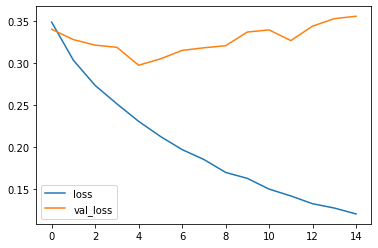

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

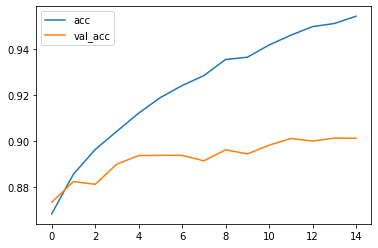

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[846   2  25  12   2   3 104   0   6   0]
 [  1 976   1  12   6   0   3   0   1   0]
 [ 15   0 861   7  51   0  63   0   3   0]
 [ 13   8  21 894  42   0  21   0   1   0]
 [  2   0  57  16 874   0  50   0   1   0]
 [  0   1   0   2   0 970   0  18   1   8]
 [ 90   0  61  19 122   0 700   0   8   0]
 [  0   0   0   0   0   9   0 951   0  40]
 [  3   1   2   4   4   4   4   3 973   2]
 [  0   0   0   0   0   5   1  27   0 967]]


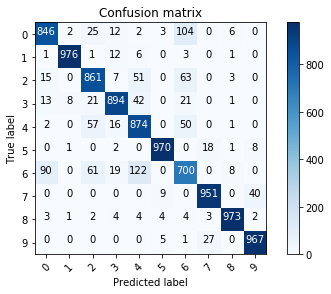

In [18]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [0]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

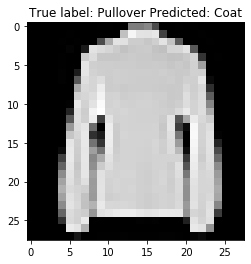

In [24]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));